<div>
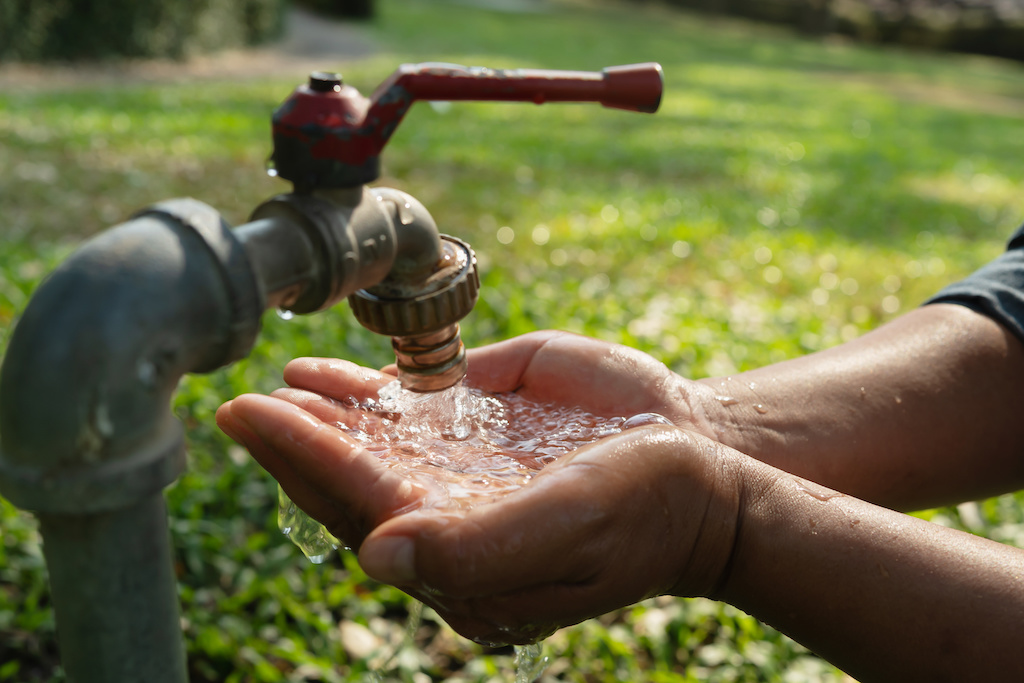
</div>
Photo by <a href="https://stock.adobe.com/contributor/203603884/lovelyday12?load_type=author&prev_url=detail" >lovelyday12</a> on Adobe Stock

# Phase 3 Project: *Tanzanian Water Pump Conditions Classification Model*

### By Ryan Posternak

Flatiron School, Full-time Live NYC<br>
Project Presentation Date: July 15th, 2022<br>
Instructor: Joseph Mata

## Goal: Identify which water pumps in Tanzania are functional, functional but in need of repair, or non-functional based on a variety of conditions and information on the pump 

<br>

# Overview and Business Understanding

<br>

# Data Understanding

<br>

# Data Cleaning, Preprocessing, & EDA

### Description of columns

**amount_tsh** - Total static head (amount water available to waterpoint)<br>
**date_recorded** - The date the row was entered<br>
**funder** - Who funded the well<br>
**gps_height** - Altitude of the well<br>
**installer** - Organization that installed the well<br>
**longitude** - GPS coordinate<br>
**latitude** - GPS coordinate<br>
**wpt_name** - Name of the waterpoint if there is one<br>
**basin** - Geographic water basin<br>
**subvillage** - Geographic location<br>
**region** - Geographic location<br>
**region_code** - Geographic location (coded)<br>
**district_code** - Geographic location (coded)<br>
**lga** - Geographic location<br>
**ward** - Geographic location<br>
**population** - Population around the well<br>
**public_meeting** - True/False<br>
**recorded_by** - Group entering this row of data<br>
**scheme_management** - Who operates the waterpoint<br>
**scheme_name** - Who operates the waterpoint<br>
**permit** - If the waterpoint is permitted<br>
**construction_year** - Year the waterpoint was constructed<br>
**extraction_type** - The kind of extraction the waterpoint uses<br>
**extraction_type_group** - The kind of extraction the waterpoint uses<br>
**extraction_type_class** - The kind of extraction the waterpoint uses<br>
**management** - How the waterpoint is managed<br>
**management_group** - How the waterpoint is managed<br>
**payment** - What the water costs<br>
**payment_type** - What the water costs<br>
**water_quality** - The quality of the water<br>
**quality_group** - The quality of the waterv<br>
**quantity** - The quantity of water<br>
**quantity_group** - The quantity of water<br>
**source** - The source of the water<br>
**source_type** - The source of the water<br>
**source_class** - The source of the water<br>
**waterpoint_type** - The kind of waterpoint<br>
**waterpoint_type_group** - The kind of waterpoint<br>
<br>

### Description of labels

**functional** - the waterpoint is operational and there are no repairs needed<br>
**functional needs repair** - the waterpoint is operational, but needs repairs<br>
**non functional** - the waterpoint is not operational

In [1]:
import numpy as np
import pandas as pd

import folium

In [2]:
# Load up the data

# Submission format example for competition
submission_format_df = pd.read_csv('data/Pump_it_Up_Data_Mining_the_Water_Table_-_Submission_format.csv')

# Load in X_train dataframe
X_train_df = pd.read_csv('data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')

# Load in y_train dataframe
y_train_df = pd.read_csv('data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')

# Load in X_test dataframe (for competition purposes only - will not be used as X_test dataframe for 
# train/test split purposes)
X_test_df = pd.read_csv('data/Pump_it_Up_Data_Mining_the_Water_Table_-_Test_set_values.csv')

In [3]:
# Preview features dataframe

print(X_train_df.shape)
X_train_df.head()

(59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
# Preview target variables dataframe

y_train_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
# Preview distribution of target variables

print(y_train_df['status_group'].value_counts(), '\n')
print(y_train_df['status_group'].value_counts(normalize=True))

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64 

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


> **Remarks:**
> - The dataset is somewhat imbalanced, with 54% in the 'functional' group, 38% in the 'non functional' group, and the remaining 7% in the 'functional needs repair' group

In [6]:
# Preview features dataframe info

X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

> **Remarks:**
> - 7 int features, 3 float features, 30 object features
> - Most features are nominal categorical descriptors, with many of the numerical descriptors actually being location identification variables
> - Some features with a lot of missing values: scheme_name, funder, installer, scheme_management


In [7]:
columns_isna = []

for column in X_train_df.columns:
    if X_train_df[column].isna().sum() > 0:
        columns_isna.append(column)
    
print('Features with missing values:')
X_train_df[columns_isna].isna().sum()

Features with missing values:


funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64

In [8]:
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


> **Remarks:**
> - No missing `status_group` labels

In [9]:
X_train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [10]:
# Coordinates of Dodoma - capital of Tanzania
dodoma_lat = -6.1630
dodoma_long = 35.7516

# Create a map of the area
base_map = folium.Map([dodoma_lat, dodoma_long], zoom_start=5.5)

# Add random sample of 300 water pumps to map, colored by water pump condition
for index, pump in X_train_df.sample(n=300).iterrows():
    lat = pump.latitude
    long = pump.longitude
    if y_train_df.iloc[index].status_group == 'functional':
        color = 'green'
    elif y_train_df.iloc[index].status_group == 'functional needs repair':
        color = 'orange'
    elif y_train_df.iloc[index].status_group == 'non functional':
        color = 'red'
    marker = folium.Marker(location=[lat, long])
    marker.add_to(base_map)
    popup_text = f"Condition: {y_train_df.iloc[index].status_group.capitalize()}"
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker(location=[lat, long], popup=popup, icon=folium.Icon(color))
    marker.add_to(base_map)
base_map

# Preprocessing

### Drop `id` column of X_train and y_train

ID numbers are not necessary for modeling purposes (I am assuming they carry no predictive value)

In [11]:
X_train_df.drop(columns='id', inplace=True)

y_train_df.drop(columns='id', inplace=True)

### Convert ternary `status_group` column of y_train from object to int: 0 if 'functional', 1 if 'functional needs repair', and 2 if 'non functional'

In [12]:
y_train_df.replace({'functional': 0, 'functional needs repair': 1, 'non functional': 2}, inplace=True)

# Sanity check
y_train_df.value_counts()

status_group
0               32259
2               22824
1                4317
dtype: int64

### Drop additional valueless variables:

1. `date_recorded` - The date the row was entered<br>
Unlikely to carry any predictive value - date of construction is already captured in `construction_year`<br>
<br>
2. `longitude` and `latitude` - GPS coordinates<br>
Such specific location information is unlikely to carry much predictive value, and substantial location information is already captured in other columns<br>
<br>
3. `num_private` - Undisclosed<br>
It is undisclosed what this feature means, but 58,643 of the 59,400 rows all contain '0' for this feature and many of the values of the feature have only one corresponding row, so it would be cumbersome to work with and is unlikely to carry any predictive value anyway<br>
<br>
4. `wpt_name` - Name of the waterpoint if there is one<br>
Unlikely to carry any predictive value,<br>
<br>
5. `subvillage` - Geographic location<br>
May potentially carry some predictive value, however substantial location information is already contained in other columns, and numerous subvillages exist with only a single row which would be tricky to deal with while modeling. Additionally, 371 missing values exist for this column.<br>
<br>
6. `recorded_by` - Group entering this row of data<br>
All rows have same value for this feature: 'GeoData Consultants Ltd'<br>
<br>

In [13]:
columns_to_drop = ['date_recorded', 'longitude', 'latitude', 'num_private', 'wpt_name', 'subvillage', 'recorded_by']

X_train_df.drop(columns=columns_to_drop, inplace=True)

In [14]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   funder                 55765 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   installer              55745 non-null  object 
 4   basin                  59400 non-null  object 
 5   region                 59400 non-null  object 
 6   region_code            59400 non-null  int64  
 7   district_code          59400 non-null  int64  
 8   lga                    59400 non-null  object 
 9   ward                   59400 non-null  object 
 10  population             59400 non-null  int64  
 11  public_meeting         56066 non-null  object 
 12  scheme_management      55523 non-null  object 
 13  scheme_name            31234 non-null  object 
 14  permit                 56344 non-null  object 
 15  co

In [19]:
X_train_df.scheme_name.value_counts()

K                       682
None                    644
Borehole                546
Chalinze wate           405
M                       400
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: scheme_name, Length: 2696, dtype: int64

In [16]:
X_train_df.isna().sum()

amount_tsh                   0
funder                    3635
gps_height                   0
installer                 3655
basin                        0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
dtype: i